In [6]:
import re
import os
import pandas as pd
import seaborn as sns
from simpledbf import Dbf5
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# BaseEstimator adds fit_transform;
# TransformerMixing adds get_params() & set_params()
from sklearn.base import BaseEstimator, TransformerMixin
%matplotlib inline

#### The goal of the project is to fit a model that predict whether an accident is caused by a man or a woman.

To start off, we read the dataset and separate the dataframe between the train and test dataset.

In [7]:
class DFSelector(BaseEstimator, TransformerMixin):
    """
    Class to the pipeline. It will add a fit_transform to the pipeline
    that will choose the columns to transform
    """
    def __init__(self, attributes):
        self.attributes = attributes
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attributes].values

In [4]:
accidents = Dbf5("data/bdatus15.dbf").to_dataframe()
#acc_train, acc_test = train_test_split(accidents, test_size=0.20, random_state=1643)

Before start analyzing the data, we want to *clean* the dataset. We will do this using Scikit-Learn's Pipelines

## Cleaning the data

In [5]:
accidents.columns

Index(['EDO', 'MES', 'ANIO', 'MPIO', 'HORA', 'MINUTOS', 'DIA', 'DIASEMANA',
       'URBANA', 'SUBURBANA', 'TIPACCID', 'AUTOMOVIL', 'CAMPASAJ', 'MICROBUS',
       'PASCAMION', 'OMNIBUS', 'TRANVIA', 'CAMIONETA', 'CAMION', 'TRACTOR',
       'FERROCARRI', 'MOTOCICLET', 'BICICLETA', 'OTROVEHIC', 'CAUSAACCI',
       'CAPAROD', 'SEXO', 'ALIENTO', 'CINTURON', 'EDAD', 'CONDMUERTO',
       'CONDHERIDO', 'PASAMUERTO', 'PASAHERIDO', 'PEATMUERTO', 'PEATHERIDO',
       'CICLMUERTO', 'CICLHERIDO', 'OTROMUERTO', 'OTROHERIDO', 'NEMUERTO',
       'NEHERIDO'],
      dtype='object')

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
class InitialClean()

## Analyzing the Data

We look at the proportion of men **(2)**, and women **(3)** that cause the accident. The encoding **(1)** represents the proportion of people that fled the accident.

In [3]:
acc_train.SEXO.value_counts() / acc_train.shape[0] * 100

2    75.646182
3    14.622668
1     9.731150
Name: SEXO, dtype: float64

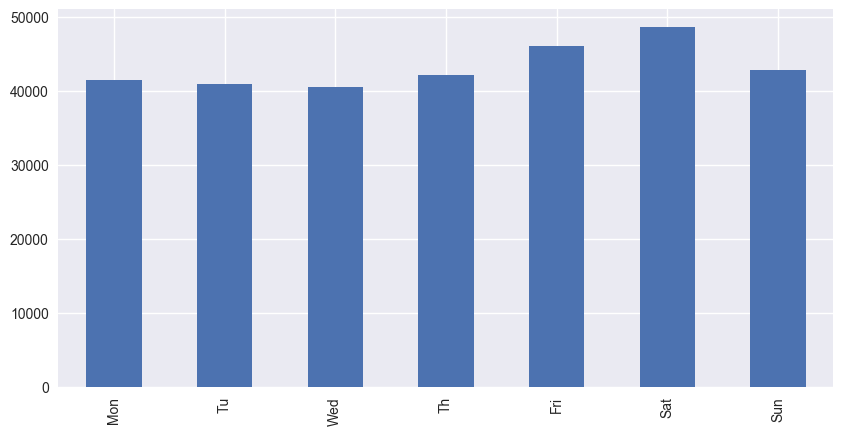

In [28]:
plt.figure(figsize=(10,5), dpi=100)
weekdays = ("Mon", "Tu", "Wed", "Th", "Fri", "Sat", "Sun")
acc_train.DIASEMANA.value_counts(sort=False).plot(kind="bar")
plt.xticks(range(7), weekdays);

We now want to know the frequency of the types of accidents. Since the values are messy (we extracted the string of valyes from a PDF), we need to clean them in order to obtain a more representative frquency plot

In [8]:
acc_code = """Clave 1.- Colisión con vehículo automotor
Clave 2.- Colisión con peatón (atropellamiento)
Clave 3.- Colisión con animal
Clave 4.- Colisión con objeto fijo
Clave 5.- Volcadura
Clave 6.- Caída de pasajero
Clave 7.- Salida del camino
Clave 8.- Incendio
Clave 9.- Colisión con ferrocarril
Clave 10.- Colisión con motocicleta
Clave 11.- Colisión con ciclista
Clave 12.- Otro""".split("\n")

re_code = "Clave [1-9][0-9]?.- "
acc_code = [re.sub(re_code, "", acc) for ix, acc in enumerate(acc_code)]
acc_code

['Colisión con vehículo automotor',
 'Colisión con peatón (atropellamiento)',
 'Colisión con animal',
 'Colisión con objeto fijo',
 'Volcadura',
 'Caída de pasajero',
 'Salida del camino',
 'Incendio',
 'Colisión con ferrocarril',
 'Colisión con motocicleta',
 'Colisión con ciclista',
 'Otro']

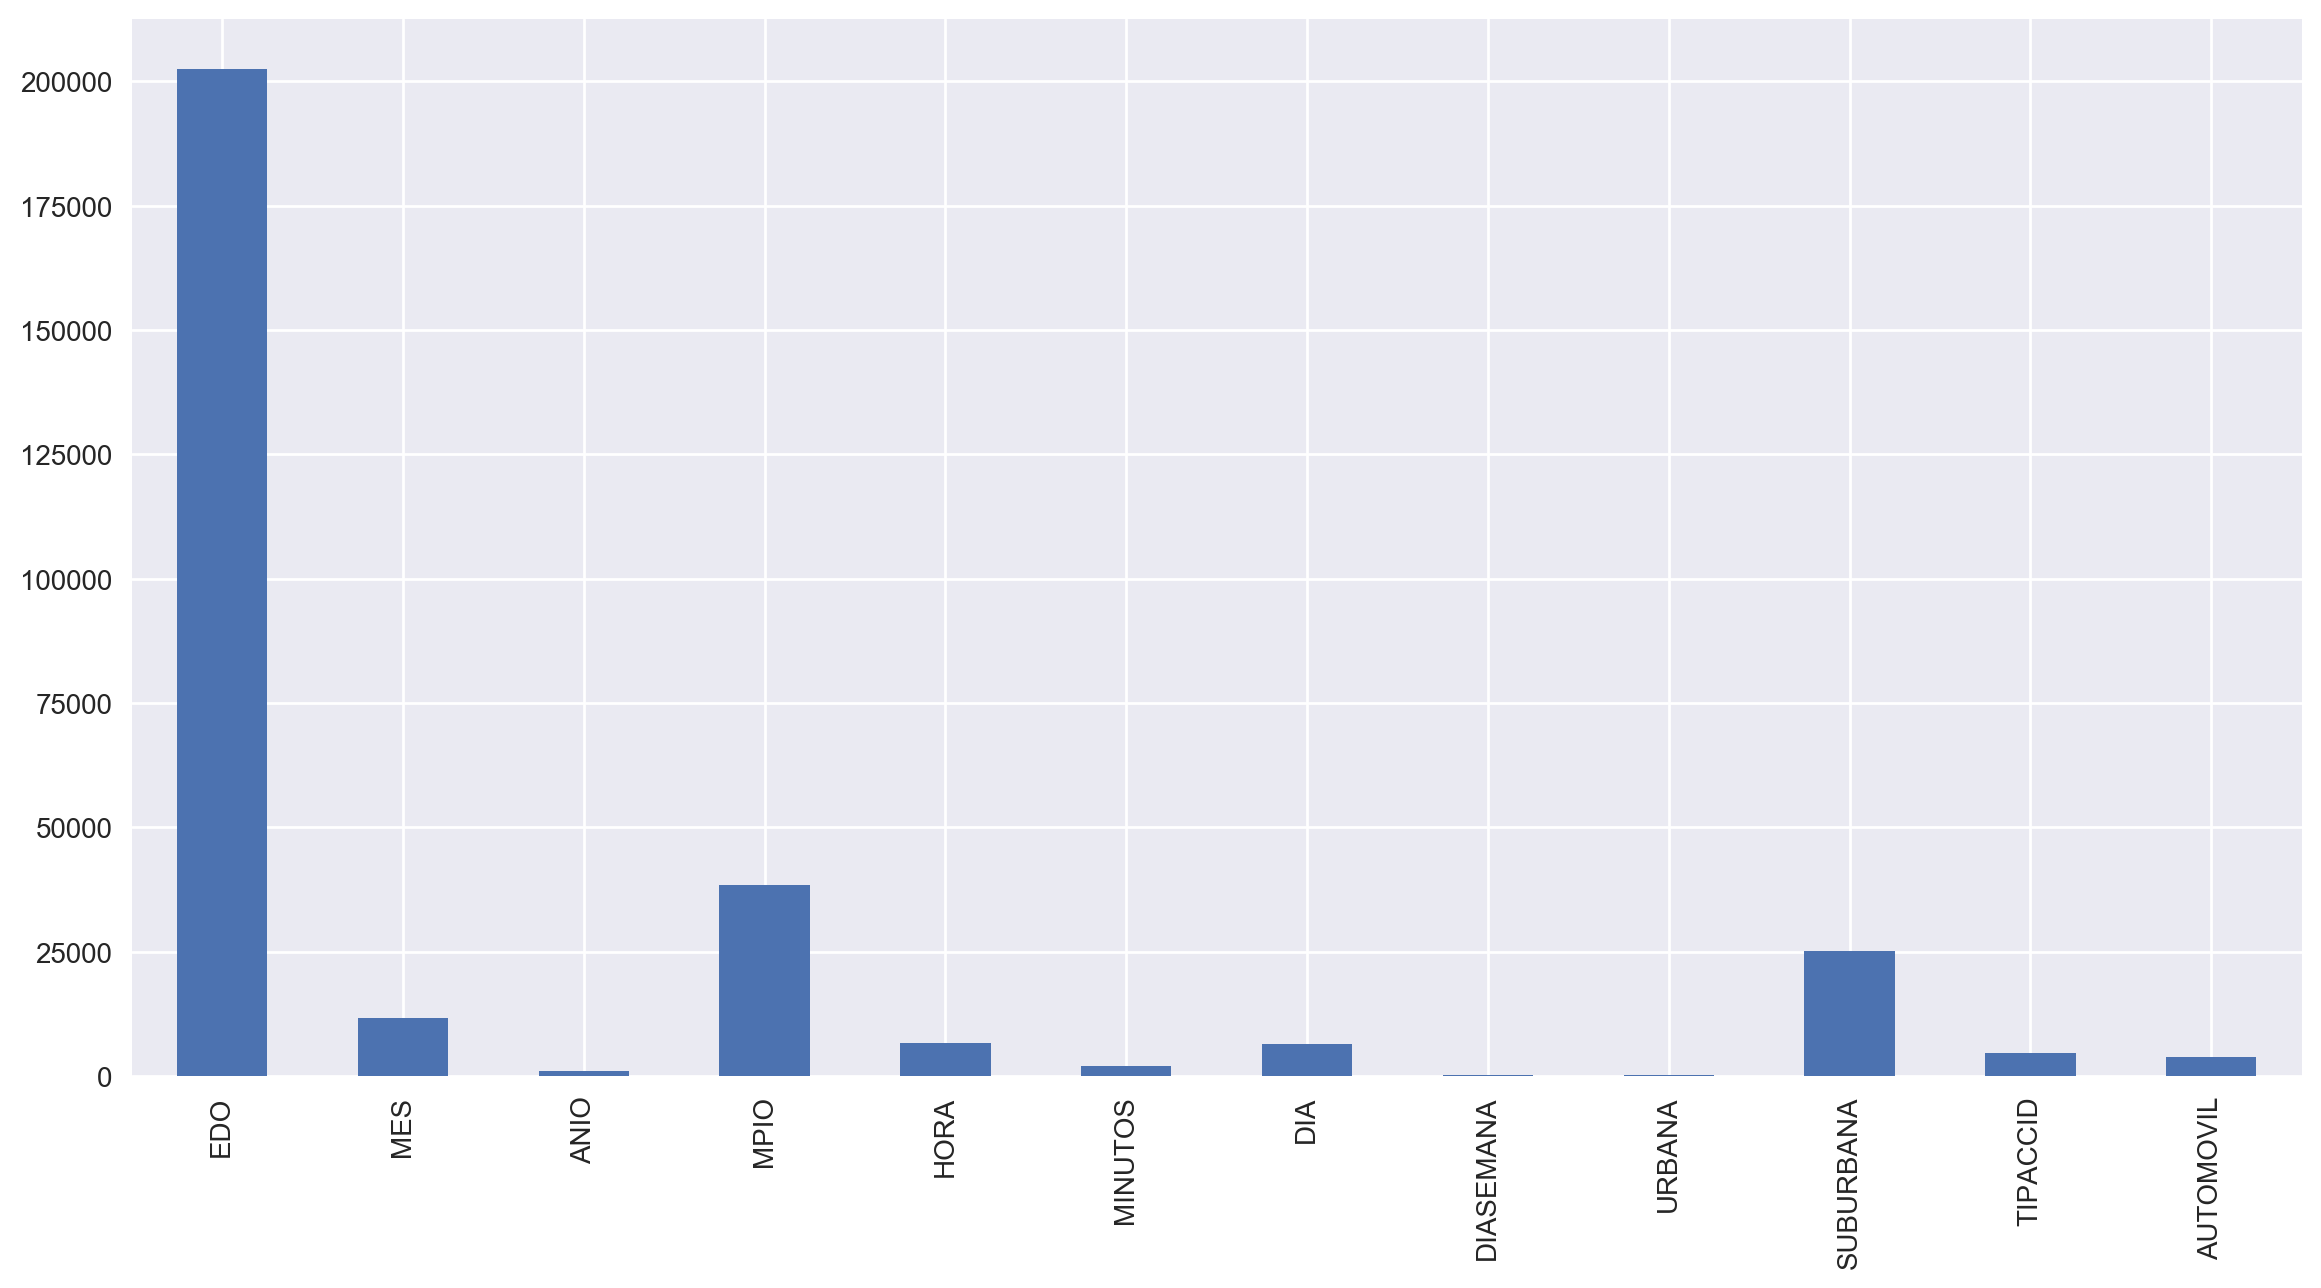

In [6]:
plt.figure(figsize=(14,7), dpi=200)
accidents_type = acc_train.TIPACCID.value_counts(sort=False)
accidents_type.plot(kind="bar")
plt.xticks(range(12), acc_code, rotation=90);

In order to get more insight, we want to see if we can find clusters of data between men and women among the different variables

In [11]:
acc_train.dtypes

EDO           int64
MES           int64
ANIO          int64
MPIO          int64
HORA          int64
MINUTOS       int64
DIA           int64
DIASEMANA     int64
URBANA        int64
SUBURBANA     int64
TIPACCID      int64
AUTOMOVIL     int64
CAMPASAJ      int64
MICROBUS      int64
PASCAMION     int64
OMNIBUS       int64
TRANVIA       int64
CAMIONETA     int64
CAMION        int64
TRACTOR       int64
FERROCARRI    int64
MOTOCICLET    int64
BICICLETA     int64
OTROVEHIC     int64
CAUSAACCI     int64
CAPAROD       int64
SEXO          int64
ALIENTO       int64
CINTURON      int64
EDAD          int64
CONDMUERTO    int64
CONDHERIDO    int64
PASAMUERTO    int64
PASAHERIDO    int64
PEATMUERTO    int64
PEATHERIDO    int64
CICLMUERTO    int64
CICLHERIDO    int64
OTROMUERTO    int64
OTROHERIDO    int64
NEMUERTO      int64
NEHERIDO      int64
dtype: object

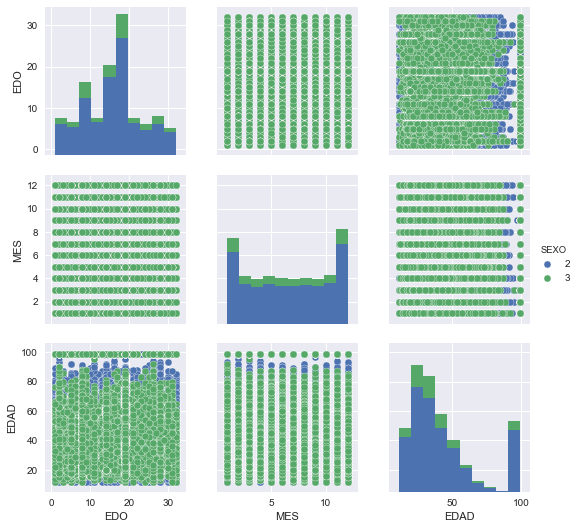

In [15]:
sns.pairplot(acc_train.query("SEXO != 1"), hue="SEXO", vars=["EDO", "MES", "EDAD"]);